In [0]:
# -------- importing libraries 

import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import radians, cos, sin, asin, sqrt
from geopy import distance

In [0]:
# -------- importing the data

taxidata = pd.read_csv("total.csv")
taxidata.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [0]:
# -------- looking for abnormal values 

# taxidata.nsmallest(20, 'fare_amount') # 10 abnormally low fares, which are below 0
# taxidata.nsmallest(20, 'pickup_longitude') 
# taxidata.nsmallest(20, 'pickup_latitude') 
# taxidata.nsmallest(20, 'dropoff_longitude') # 1 abnormal value of -85
# taxidata.nsmallest(20, 'dropoff_latitude') 
# taxidata.nsmallest(150, 'passenger_count') # between 150 and 200 with no passenger
# taxidata.nlargest(20, 'fare_amount') # highest is 200, but it's not impossible
# taxidata.nlargest(20, 'pickup_longitude') 
# taxidata.nlargest(20, 'pickup_latitude') # 1 abnormal value of 400
# taxidata.nlargest(20, 'dropoff_longitude')
# taxidata.nlargest(20, 'dropoff_latitude')
# taxidata.nlargest(20, 'passenger_count')

In [0]:
# -------- deleting abnormal values found above

taxidata = taxidata[taxidata.pickup_latitude < 180]
taxidata = taxidata[taxidata.fare_amount > 0]
taxidata = taxidata[taxidata.dropoff_longitude > -85]
taxidata = taxidata[taxidata.pickup_latitude != 0]
taxidata = taxidata[taxidata.passenger_count != 0]
taxidata = taxidata[taxidata.pickup_longitude != 0]
taxidata = taxidata[taxidata.dropoff_latitude != 0]
taxidata = taxidata[taxidata.dropoff_latitude != 0]
taxidata.dropna()

In [0]:
# -------- number of remaining observations

len(taxidata) # 48835

48835

In [0]:
# -------- calculating distance traveled

for index, row in taxidata.iterrows():
  coords_1 = taxidata.loc[index, "pickup_latitude"], taxidata.loc[index, "pickup_longitude"]
  coords_2 = taxidata.loc[index, "dropoff_latitude"], taxidata.loc[index, "dropoff_longitude"]
  taxidata.loc[index, "distance_traveled"] = distance.distance(coords_1, coords_2).km

In [0]:
# -------- looking if it worked

taxidata.head()

In [0]:
# -------- looking for abnormal values 

# taxidata.nsmallest(20, 'distance_traveled') # bunch of zero distance traveled
# taxidata.nlargest(20, 'distance_traveled') # bunch of 4,000km+ ditance traveled

In [0]:
# -------- deleting abnormal values 

taxidata = taxidata[taxidata.distance_traveled > 0.1]
taxidata = taxidata[taxidata.distance_traveled < 50]
taxidata.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_traveled
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.029601
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.443441
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389132
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.795790
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.998338


In [0]:
# -------- checking if abnormal values remain

taxidata.loc[:, "distance_traveled"].max() # 44.7km
# taxidata.loc[:, "distance_traveled"].min() # 0.1km traveled, unlikely but not impossible

44.69995031711877

In [0]:
# -------- number of remaining observations

len(taxidata) # 47962

47962

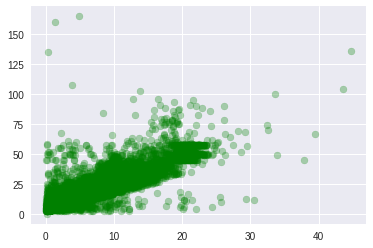

In [0]:
# -------- inspecting the relationship between fare_amount and distance_traveled

plt.scatter(taxidata.loc[:, "distance_traveled"], 
            taxidata.loc[:, "fare_amount"], alpha = 0.3, color="green")

# strong linear relationship!

In [0]:
# -------- inspecting the relationships between variables

taxidata.corr() # all null, except for distance_traveled (0.897)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_traveled
fare_amount,1.000000,0.013313,-0.009036,0.011820,-0.008824,0.017185,0.897527
pickup_longitude,0.013313,1.000000,-0.995385,0.999835,-0.995347,0.005151,0.011154
pickup_latitude,-0.009036,-0.995385,1.000000,-0.995368,0.999900,-0.004999,-0.007779
dropoff_longitude,0.011820,0.999835,-0.995368,1.000000,-0.995326,0.005039,0.010342
dropoff_latitude,-0.008824,-0.995347,0.999900,-0.995326,1.000000,-0.005082,-0.006924
passenger_count,0.017185,0.005151,-0.004999,0.005039,-0.005082,1.000000,0.014643
distance_traveled,0.897527,0.011154,-0.007779,0.010342,-0.006924,0.014643,1.000000


In [0]:
# -------- separating dependent and independent variables

y = taxidata.loc[:, "fare_amount"]
X = taxidata.loc[:, ["distance_traveled", "passenger_count"]]

In [0]:
# -------- train test split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [0]:
# -------- fitting the model to the training data

model = linear_model.LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
y_test_predict= model.predict(X_test)

Text(0, 0.5, 'Observed values')

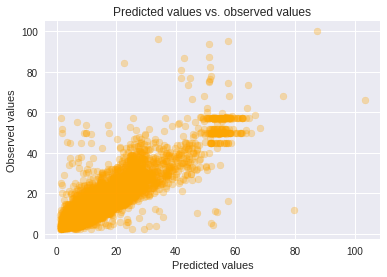

In [0]:
# -------- making predictions with a regression model, comparing the to the observations

predictions_reg = y_test_predict
observations = y_test
plt.scatter(predictions_reg, observations, color="orange", alpha=0.3)
plt.title("Predicted values vs. observed values (regression)")
plt.xlabel("Predicted values")
plt.ylabel("Observed values")

# strong linear relationship!

In [0]:
# -------- how strong is the relationship plotted above?

np.corrcoef(predictions_reg, observations)[0][1] # correlation coefficient of 0.895

0.8945868034463869

In [0]:
# -------- calculating the mean absolute error 

mean_absolute_error(y_test_predict, y_test) # 2.68

2.681902635731734

Text(0, 0.5, 'Observed values')

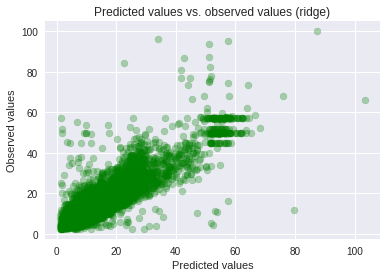

In [0]:
# -------- training and plotting ridge regression model

reg = linear_model.Ridge()
reg.fit(X_train, y_train)
y_test_predict_reg = reg.predict(X_test)
predictions_ridge = y_test_predict_reg

plt.scatter(predictions_reg, observations, color="green", alpha=0.3)
plt.title("Predicted values vs. observed values (ridge)")
plt.xlabel("Predicted values")
plt.ylabel("Observed values")

# strong linear relationship!


In [0]:
# -------- how strong is the relationship plotted above?

np.corrcoef(predictions_ridge, observations)[0][1] # correlation coefficient of 0.90

0.9029475628388142

In [0]:
# -------- calculating the mean absolute error 

mean_absolute_error(predictions_ridge, observations) # 2.22

2.2286896754261214

In [0]:
# -------- splitting training data into training and validation sets

X_train_2, X_validation, y_train_2, y_validation = train_test_split(X_train,y_train,test_size=0.1)

In [0]:
# -------- testing various lambda values 

for i in range(0, 11):
  skridge = linear_model.Ridge(alpha=0+i/10)
  skridge.fit(X_train_2, y_train_2)
  y_valid_predict_ridge= skridge.predict(X_validation)
  mae_ridge = mean_absolute_error(y_valid_predict_ridge, y_validation)
  print("Ridge with Lambda value of " + str(0+i/10) + " gives a MAE of " + str(mae_ridge))

In [0]:
# -------- the value of lambda doesn't matter, because i have only one large coefficient

In [0]:
# -------- using the selected lambda value on the test set, exporting it 

y_test_predict_ridge = skridge.predict(X_test)
predictions_ridge_test = y_test_predict_ridge

predictions_csv = pd.DataFrame(predictions_ridge_test, X_test.index).to_csv("test_predictions.csv", index=[X_test.index])

Text(0, 0.5, 'Observed values')

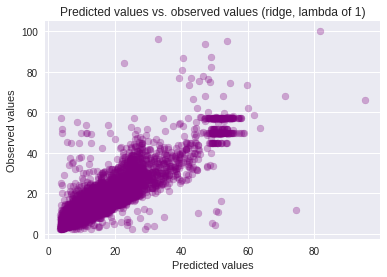

In [0]:
plt.scatter(predictions_ridge_test, observations, color="purple", alpha=0.3)
plt.title("Predicted values vs. observed values (ridge, lambda of 1)")
plt.xlabel("Predicted values")
plt.ylabel("Observed values")

In [0]:
# -------- mae of the ridge regression model with lambda of 1

mean_absolute_error(y_test_predict_ridge, y_test) # 2.22

2.2281452305225007